<a href="https://colab.research.google.com/github/HarshithRKumar/Machine-Learning-Models/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,n_features=5,centers=2,random_state=42)
df=pd.DataFrame(x,columns=['F1','F2','F3','F4','F5'])
df.head()


,F1,F2,F3,F4,F5
0,-2.409546,8.510810,3.089215,2.041733,-7.941931
1,-0.743743,9.419268,3.378995,2.891032,-4.757471
2,-3.837384,9.211147,5.378345,2.144538,-6.995275
3,-3.329880,9.977662,5.052660,2.795230,-4.982834
4,-1.695680,7.783422,4.867339,3.280312,-8.487110


In [ ]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xl=sc.fit_transform(x)
xl.shape

(100, 5)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
xg=pca.fit_transform(xl)
xg.shape

(100, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xg,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_train,y_train)
pred=kmeans.predict(x_test)

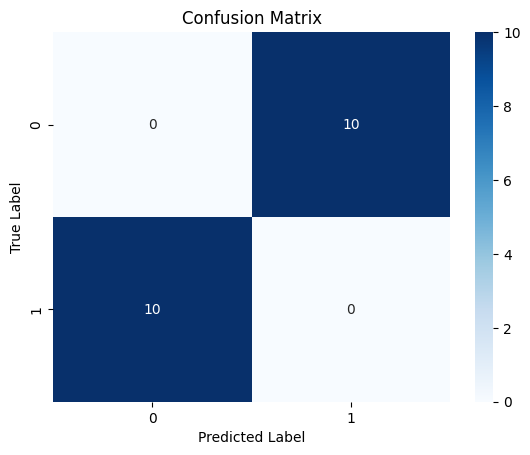

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'After PCA: Projected onto 2 Principal Components')

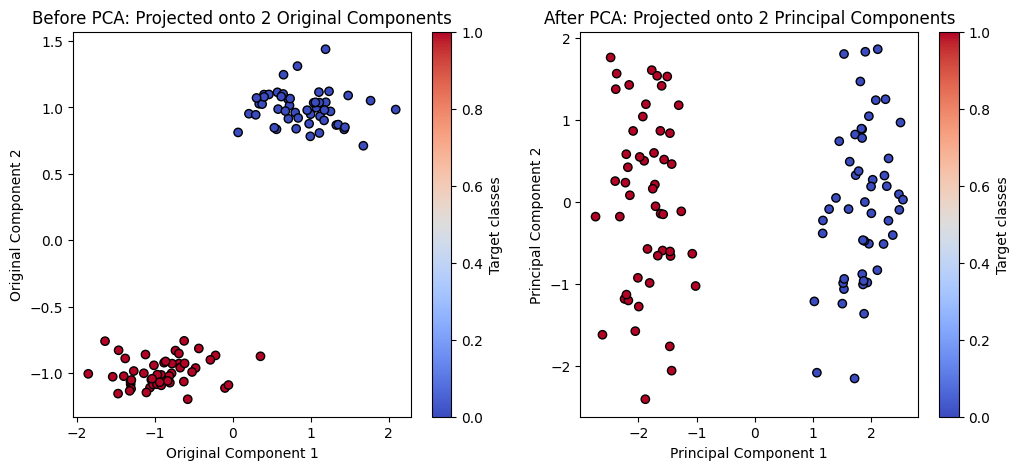

In [ ]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(xl[:, 0], xl[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Target classes')
plt.xlabel('Original Component 1')
plt.ylabel('Original Component 2')
plt.title('Before PCA: Projected onto 2 Original Components')

plt.subplot(1, 2, 2)
plt.scatter(xg[:, 0], xg[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Target classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')